In [1]:
import pandas as pd
import numpy as np
import math
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Function to check convergence based on 1-norm of delta_theta_l_theta
def converged(delta_theta_l_theta, conv):
    s = abs(delta_theta_l_theta[0]) + abs(delta_theta_l_theta[1]) + abs(delta_theta_l_theta[2])
    if(s < conv):
        return True
    return False

#Function to calculate delta_theta_l_theta
def delta_l(x, y, theta, m):
    diff = np.zeros(m)
    newx = np.zeros((m,3))
    for i in range(0, m):
        theta_t_x_i = theta[0]*x[i][0] + theta[1]*x[i][1] + theta[2]*x[i][2]
        h_theta_x_i = 1/(1 + np.exp(-theta_t_x_i))
        diff[i] = y[i] - h_theta_x_i
        newx[i,:] = x[i,:]*diff[i]
        
    return np.mean(newx, axis=0)

#Function to calculate the hessian matrix and its inverse 
def hessian_inverse(x, theta, m):
    hessian = np.zeros((m,m), dtype='float64')
    for i in range(0, m):
        theta_t_x_i = theta[0]*x[i][0] + theta[1]*x[i][1] + theta[2]*x[i][2]
        h_theta_x_i = 1/(1 + np.exp(-theta_t_x_i))
        hessian[i][i] = h_theta_x_i*(1-h_theta_x_i)
    
    x_transpose = np.transpose(x)
    return np.linalg.inv(x_transpose.dot(hessian.dot(x)))
    
#Function for Gradient Descent of logistic regression
def logisticreg(x, y):
    theta = np.array([0.0, 0.0, 0.0])
    t = 0
    delta_theta_l_theta = np.array([1, 1, 1], dtype='float64')
    while(converged(delta_theta_l_theta, 0.001) == False):
        delta_theta_l_theta = delta_l(x, y, theta, dfx.shape[0])
        h_inverse_delta_l = hessian_inverse(x, theta, dfx.shape[0]).dot(delta_theta_l_theta.reshape(3, 1))
        for i in range(0, 3):
            theta[i] += h_inverse_delta_l[i]
        t += 1
    return theta

dfx = pd.read_csv('logisticX.csv')
dfy = pd.read_csv('logisticY.csv')
x1x2 = dfx.to_numpy()
x_normed = (x1x2 - x1x2.mean(axis=0)) / x1x2.std(axis=0)
x = np.ones((dfx.shape[0], 1))
x = np.append(x, x_normed, axis=1)
y = dfy.to_numpy(dtype='float64')
theta = logisticreg(x, y)
print(theta)

[ 0.39170362  2.55715793 -2.69153177]


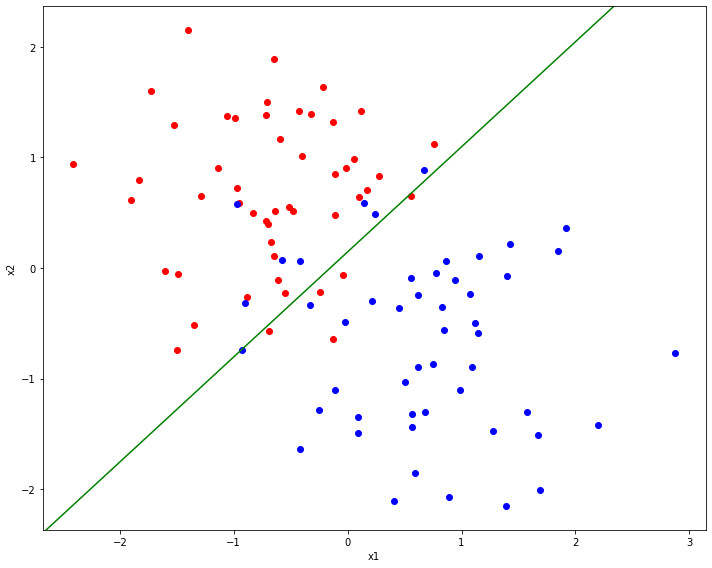

In [3]:
#Plotting the data and the best fit line as per theta values
xy = np.append(x_normed, dfy.to_numpy(), axis=1)
xy0 = xy[np.where(xy[:,2]==0)]
xy1 = xy[np.where(xy[:,2]==1)]
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(xy0[:, 0], xy0[:, 1], c='red')
plt.scatter(xy1[:, 0], xy1[:, 1], c='blue')
plt.axline((0, -(theta[0]/theta[2])), slope=-theta[1]/theta[2], c='green')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()